## Test reading a spectrum with hyperspy

Our task will be to read and plot a spectrum. In this case it is the sum spectrum from Oxford's paint exemplar. We will assign and plot some X-ray transitions.

First we need to set up the imports to use `hyperspy` to work with thhe new iPython3 notebook.

In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import hyperspy.hspy as hs
# set the default figure size
plt.rcParams['figure.figsize'] = 11, 7

First we will load the data from the file `oxford.msa`. Hyperspy would default to defining the acquistion instument as TEM, so we set `signal_type = "EDS_SEM"`. We also let the program know this is experimental data.

In [2]:
s = hs.load("oxford.msa", signal_type="EDS_SEM", signal_origin="experiment")
s.metadata

├── Acquisition_instrument
│   └── SEM
│       ├── Detector
│       │   └── EDS
│       │       ├── azimuth_angle = 0.0
│       │       ├── elevation_angle = 35.0
│       │       ├── energy_resolution_MnKa = 130.0
│       │       ├── live_time = 14386.79037
│       │       └── real_time = 26400.38091
│       ├── beam_current = 0.0
│       ├── beam_energy = 20.0
│       └── tilt_stage = 0.0
├── General
│   ├── date = 2011-05-19
│   ├── original_filename = oxford.msa
│   ├── time = 05:07:00
│   └── title = Map Sum Spectrum
└── Signal
    ├── binned = True
    ├── record_by = spectrum
    ├── signal_origin = experiment
    └── signal_type = EDS_SEM

Note the spectrum file did not contain the probe current, so we can supply it, along with a couple of other pieces of metadata.

In [3]:
s.metadata.Acquisition_instrument.SEM.beam_current = 2.75
s.metadata.General.title = "Paint 20 kV map sum"

Now we plot the spectrum. We will need to use some `matplotlib` commands to get the axes labeled to our satisfactions.

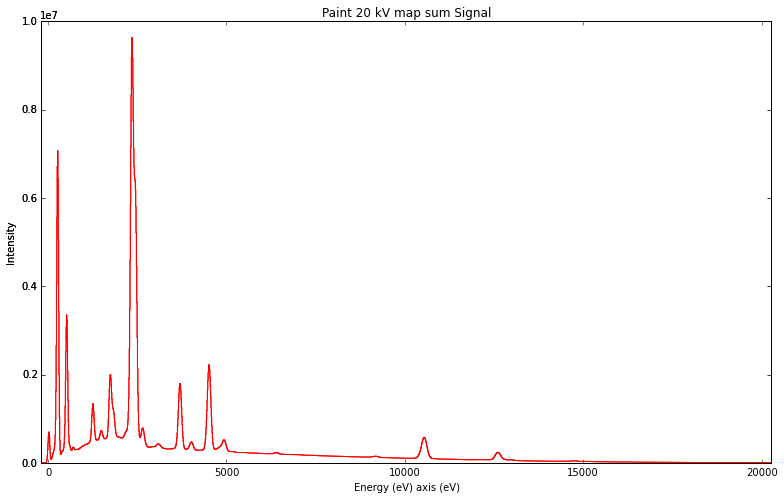

In [4]:
s.plot()

We can see how the axes are labeled, by querying the `axes_manager`

In [5]:
s.axes_manager

<Axes manager, axes: (|<Energy (eV) axis, size: 2048>)>

Let's print out the energy axis information

In [6]:
print(s.axes_manager["Energy (eV)"].scale)
print(s.axes_manager["Energy (eV)"].units)
print(s.axes_manager["Energy (eV)"].offset)

10.0
eV
-200.0


We want to add some elements and X-ray transitions. Only now can we add the sample description.

In [7]:
s.add_lines()
s.metadata.Sample.description = 'Paint cross section'
s.set_elements(['C','O', 'Pb', 'Ti', 'Ca', 'Si', 'Mg', 'S', 'Al', 'Ba', 'Fe'])
# second call automatically adds lines...
s.add_lines()
s.metadata

Al_Ka line added,
Ba_La line added,
C_Ka line added,
Ca_Ka line added,
Fe_Ka line added,
Mg_Ka line added,
O_Ka line added,
Pb_Ma line added,
S_Ka line added,
Si_Ka line added,
Ti_Ka line added,


├── Acquisition_instrument
│   └── SEM
│       ├── Detector
│       │   └── EDS
│       │       ├── azimuth_angle = 0.0
│       │       ├── elevation_angle = 35.0
│       │       ├── energy_resolution_MnKa = 130.0
│       │       ├── live_time = 14386.79037
│       │       └── real_time = 26400.38091
│       ├── beam_current = 2.75
│       ├── beam_energy = 20.0
│       └── tilt_stage = 0.0
├── General
│   ├── date = 2011-05-19
│   ├── original_filename = oxford.msa
│   ├── time = 05:07:00
│   └── title = Paint 20 kV map sum
├── Sample
│   ├── description = Paint cross section
│   ├── elements = ['Al', 'Ba', 'C', 'Ca', 'Fe', 'Mg', 'O', 'Pb', 'S', 'Si', 'Ti']
│   └── xray_lines = ['Al_Ka', 'Ba_La', 'C_Ka', 'Ca_Ka', 'Fe_Ka', 'Mg_Ka', 'O_Ka', 'Pb_Ma', 'S_Ka', 'Si_Ka', 'Ti_Ka']
└── Signal
    ├── binned = True
    ├── record_by = spectrum
    ├── signal_origin = experiment
    └── signal_type = EDS_SEM

Now, let's plot the spectrum with the X-ray transitions.

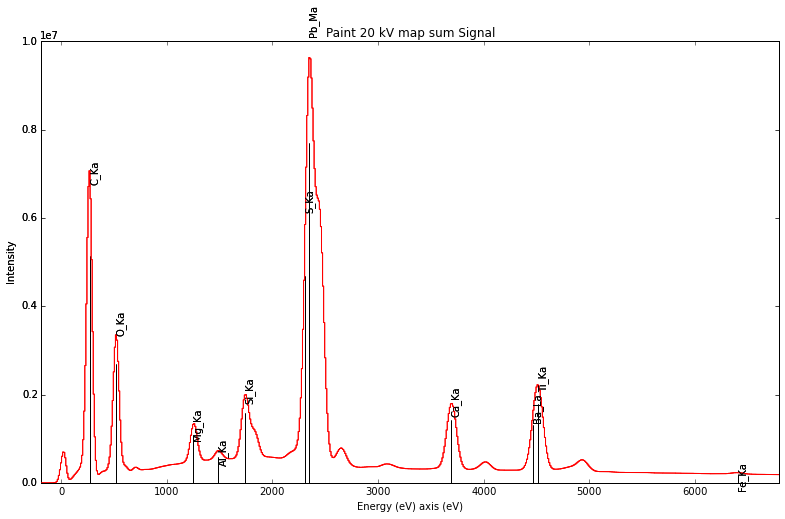

In [8]:
s[1:700].plot(True)

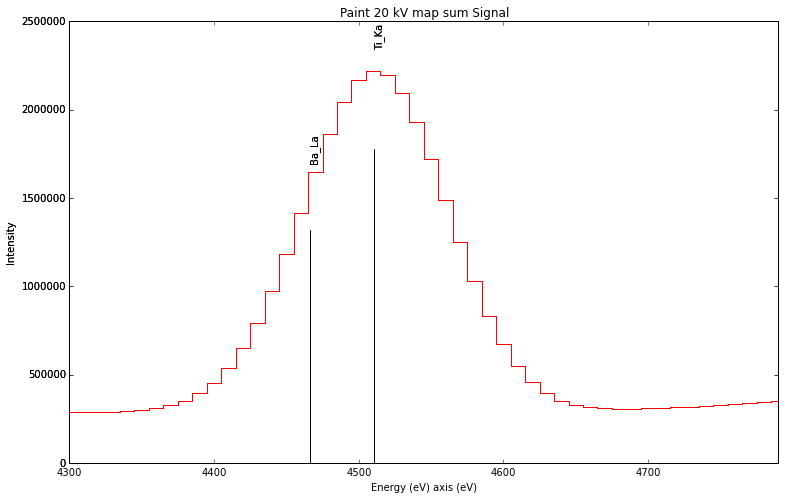

In [9]:
s[450:500].plot(True, ['Ba','Ti'])